In [202]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [203]:
df = pd.read_csv('ex1.csv')
df.describe()
df.sample(5)

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
4539,4539,108701,2016-01-21,California,Santa Rosa,101 and Prince Memorial Greenway,-1,0,5.0,NaN,...,NaN,0::43,0::Adult 18+,0::Male,0::Benjamin Louis Guleng,NaN,0::Killed,0::Victim,10.0,2.0
16915,16915,233633,2018-02-20,-1,Akron,19th St SW,0,-2,13.0,0::Unknown,...,NaN,0::32||1::34,0::Adult 18+||1::Adult 18+,0::Male||1::Male,NaN,NaN,0::Injured||1::Injured,0::Victim||1::Victim,35.0,28.0
10160,10160,127667,2016-05-25,Georgia,Marietta,347 Pat Mell Rd SW,-2,0,11.0,NaN,...,NaN,NaN,2::Adult 18+,2::Male,NaN,NaN,0::Killed||1::Killed||2::Arrested,0::Victim||1::Victim||2::Subject-Suspect,41.0,33.0
21990,21990,22970,2014-06-24,florida,Fort Myers,Breeze Street,0,0,19.0,NaN,...,Shots fired - no injury,NaN,0::Adult 18+,0::Female,NaN,NaN,0::Unharmed,0::Victim,76.0,30.0
22414,22414,43649,2014-10-26,-1,Palestine,4000 block of West Oak St.,0,0,5.0,NaN,...,"ar, Palestine police department investigating",NaN,1::Adult 18+,1::Male,NaN,NaN,0::Unharmed||1::Unharmed,0::Victim||1::Subject-Suspect,8.0,3.0


# Question 1 - a
The Categorical features are:
gun_type,state,city_or_county,participant_gender,participant_relationship,participant_status,participant_type,state_house_district,gun_stolen

The Ordinal features are:
participant_age_group
date- it is basically a chronological feature but it its the closest to ordinal since its values does have order due to some criteria

The continuous features are:
latitude,longitude,n_killed,n_injured,n_guns_involved,participant_age

Closets to categorical features but not really:
incident_id,address,location_description,notes,participant_name

address - is more of a geospatial feature



In [204]:
df.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'address', 'n_killed', 'n_injured', 'congressional_district',
       'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'state_house_district', 'state_senate_district'],
      dtype='object')

# Question 1 - b

In [205]:
def fill_nah_with_node(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    fills all nah value in the column with the mode of the feature
    :param dataframe:
    :return:
    """
    for feature in dataframe.columns:
        mode = df[feature].mode()[0]
        dataframe[feature] = dataframe[feature].fillna(mode)
    return dataframe

In [206]:
df = fill_nah_with_node(df)
df.isna().sum().unique()  # counts the number of na values in the series and double check  with unique()

array([0], dtype=int64)

# Question 1 - C
the columns i will fix are -
1. n_killed,n_injured - negative values, i fixed it with using abs values as i assumed error of typing

2. states - Capital letter and non capital letter making two states out of one

3. longitude and latitude - str values in the series

In [207]:
# 1 -
df['n_injured'] = abs(df['n_injured'])
df['n_killed'] = abs(df['n_killed'])
# 2
df.loc[:,'state'] = df['state'].str.lower()
df.loc[:,'city_or_county'] = df['city_or_county'].str.lower()

# 3
cols = ['latitude', 'longitude']
for col in cols:
    mean_col = pd.to_numeric(df[col], errors='coerce').mean()
    nas_mask = pd.to_numeric(df[col], errors='coerce').isnull()
    df[col] = df[col].where(~nas_mask, mean_col)


# Question 2
for this question the severity will be determined by the number of shooting incidents in each year

In [208]:
# creating is_shooting feature
is_shooting = lambda word: 0 if 'Non-Shooting' in word else 1
df["is_shooting"] = df['incident_characteristics'].apply(is_shooting)
df["is_shooting"]

0        1
1        1
2        1
3        1
4        0
        ..
23962    1
23963    1
23964    1
23965    0
23966    1
Name: is_shooting, Length: 23967, dtype: int64

In [209]:
df['date'] = pd.to_datetime(df['date'])

first_data = df['date'].dt.date.min()
last_data = df['date'].dt.date.max()
print(f"First data:{first_data}, Last data:{last_data}")

First data:2013-01-07, Last data:2018-03-31


In [210]:
grouped_by_year = df.groupby(by=df['date'].dt.year)['is_shooting'].count().reset_index()
grouped_by_year

,date,is_shooting
0,2013,23
1,2014,5199
2,2015,5368
3,2016,5819
4,2017,6144
5,2018,1414


Text(0.5, 1.0, 'Number of Shootings Each Year')

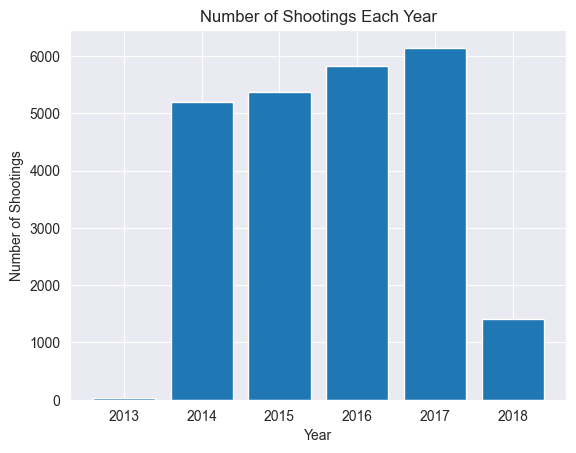

In [211]:
dates_groups = grouped_by_year['date']
shooting_each_year = grouped_by_year['is_shooting']

fig, ax = plt.subplots(1, 1)
ax.bar(dates_groups, shooting_each_year)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Shootings')
ax.set_title('Number of Shootings Each Year')

# Show the plot

# barplot explenation
here we can see that the amount of shooting incidents raised constantly from 2014 to 2017
i assume that not enough incidents were sampled in 2012 and 2018 due to the unexplained raletive  drop in the number of incidents

# Question 2 - b
The location feature i chose is state, and this is because it can show a behavior of bigger area and maybe people from the same state identity will have more similar behavior, with that its easier to see amount of ~52 states that ~ 1100 cities

The cons is that i can look at a bigger picture and not really look at the differences between smaller areas in the same state

For this question i will first show the number of incidents and injured in each state, but we have to remember that we dont know the population size of each state according to this data and one way to measure danger in by showing the ration of injured/incidents
which is the mean of injured people per incident in each state


In [212]:
df_no_unknown_state = df[df['state'] != '-1']
group_by_state_incidents_n = df.groupby(by=df_no_unknown_state['state'])['incident_id'].count().reset_index()
group_by_state_incidents_n = group_by_state_incidents_n.rename(columns={"incident_id": "crimes_num"})
group_by_state_incidents_n

,state,crimes_num
0,alabama,330
1,alaska,85
2,arizona,150
3,arkansas,159
4,california,1098
5,colorado,206
6,connecticut,217
7,delaware,116
8,district of columbia,223
9,florida,983


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'hawaii'),
  Text(1, 0, 'wyoming'),
  Text(2, 0, 'vermont'),
  Text(3, 0, 'south dakota'),
  Text(4, 0, 'north dakota'),
  Text(5, 0, 'montana'),
  Text(6, 0, 'idaho'),
  Text(7, 0, 'pennsylvania'),
  Text(8, 0, 'new york'),
  Text(9, 0, 'ohio'),
  Text(10, 0, 'texas'),
  Text(11, 0, 'florida'),
  Text(12, 0, 'california'),
  Text(13, 0, 'illinois')])

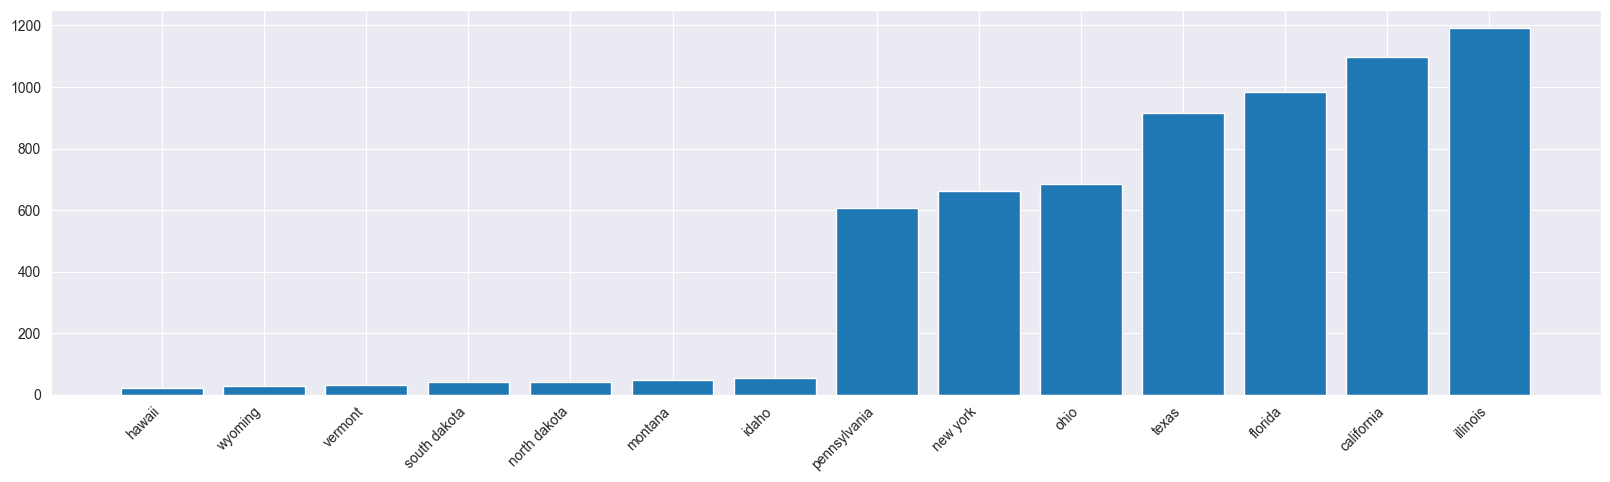

In [213]:
top_seven_incidents = group_by_state_incidents_n.nlargest(7, 'crimes_num')
bottom_seven_incidents = group_by_state_incidents_n.nsmallest(7, 'crimes_num')

concat_top_bottom_crimes = pd.concat([top_seven_incidents,bottom_seven_incidents]).sort_values(by='crimes_num')
sorted_data = concat_top_bottom_crimes.sort_values(by='crimes_num')

state_sorted = sorted_data['state']
crimes_num_sorted = sorted_data['crimes_num']

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.bar(state_sorted, crimes_num_sorted)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'vermont'),
  Text(1, 0, 'wyoming'),
  Text(2, 0, 'hawaii'),
  Text(3, 0, 'north dakota'),
  Text(4, 0, 'south dakota'),
  Text(5, 0, 'idaho'),
  Text(6, 0, 'maine'),
  Text(7, 0, 'new york'),
  Text(8, 0, 'pennsylvania'),
  Text(9, 0, 'texas'),
  Text(10, 0, 'ohio'),
  Text(11, 0, 'florida'),
  Text(12, 0, 'california'),
  Text(13, 0, 'illinois')])

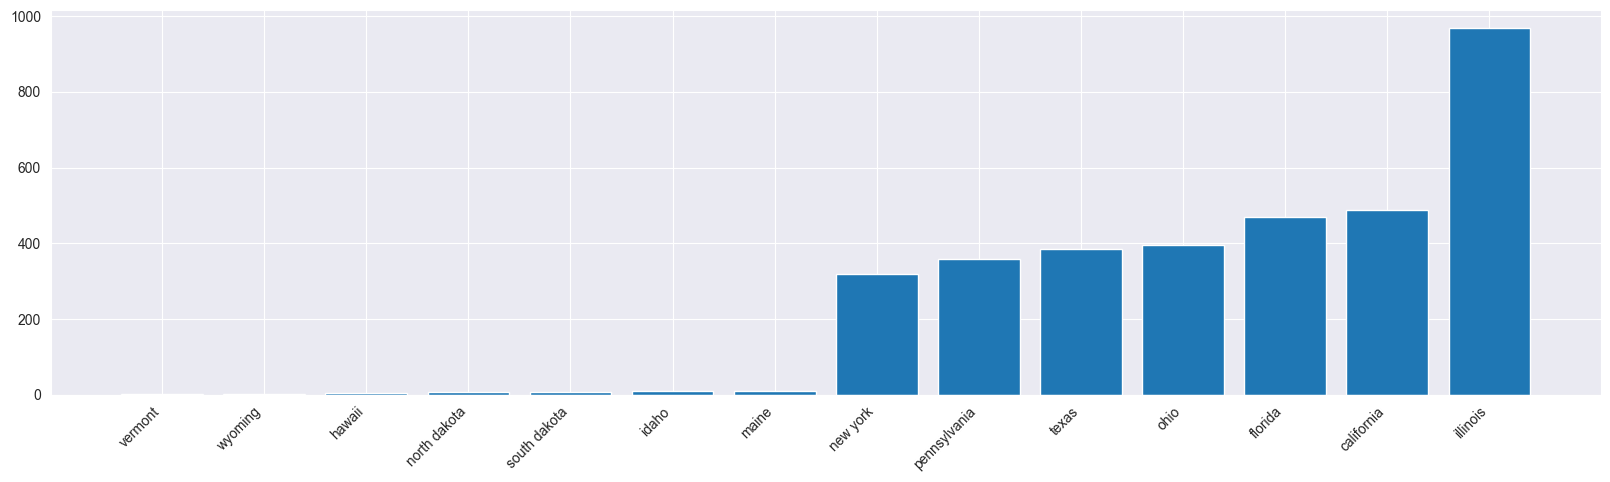

In [214]:
group_by_state_injured = df.groupby(by=df_no_unknown_state['state'])['n_injured'].sum().reset_index()

top_seven_injuries_n = group_by_state_injured.nlargest(7, 'n_injured')
bottom_seven_injuries_n = group_by_state_injured.nsmallest(7, 'n_injured')
sorted_data_injured_n = pd.concat([top_seven_injuries_n,bottom_seven_injuries_n])
sorted_data_injured_n = sorted_data_injured_n.sort_values(by='n_injured')

state_sorted = sorted_data_injured_n['state']
injured_num_sorted = sorted_data_injured_n['n_injured']

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.bar(state_sorted, injured_num_sorted)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'vermont'),
  Text(1, 0, 'wyoming'),
  Text(2, 0, 'maine'),
  Text(3, 0, 'new hampshire'),
  Text(4, 0, 'idaho'),
  Text(5, 0, 'north dakota'),
  Text(6, 0, 'south dakota'),
  Text(7, 0, 'hawaii'),
  Text(8, 0, 'alaska'),
  Text(9, 0, 'massachusetts'),
  Text(10, 0, 'north carolina'),
  Text(11, 0, 'maryland'),
  Text(12, 0, 'tennessee'),
  Text(13, 0, 'indiana'),
  Text(14, 0, 'louisiana'),
  Text(15, 0, 'ohio'),
  Text(16, 0, 'missouri'),
  Text(17, 0, 'pennsylvania'),
  Text(18, 0, 'virginia'),
  Text(19, 0, 'illinois')])

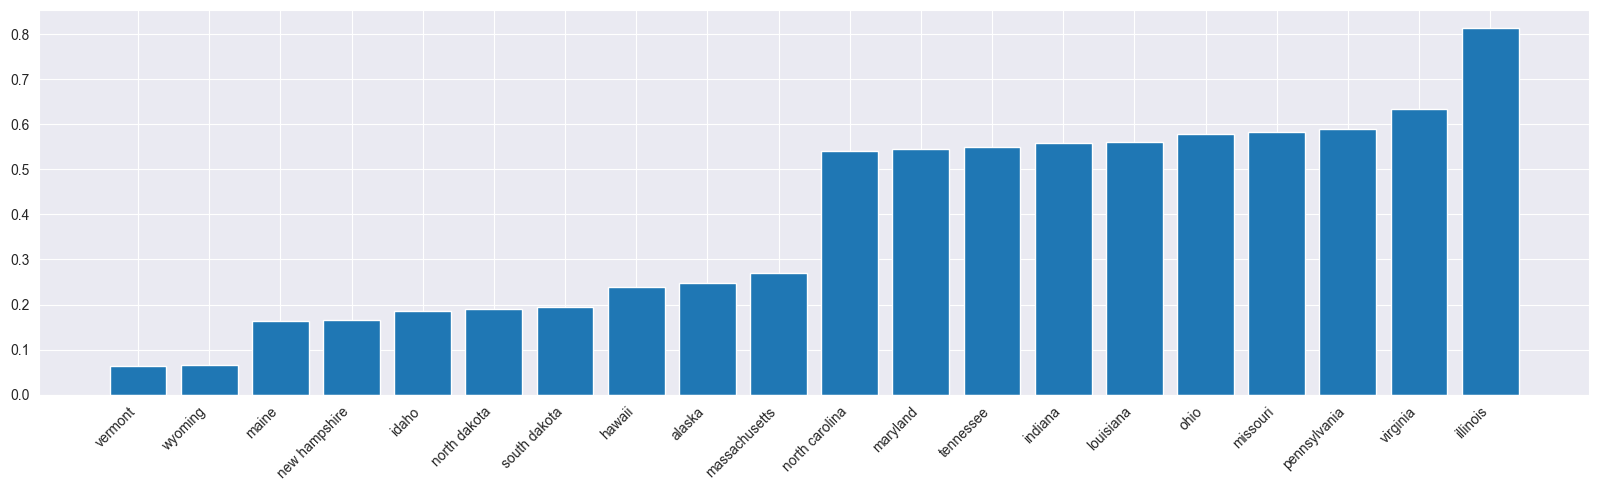

In [215]:
group_by_state_injured = df.groupby(by=df_no_unknown_state['state'])['n_injured'].mean().reset_index()

top_seven_injuries_n = group_by_state_injured.nlargest(10, 'n_injured')
bottom_seven_injuries_n = group_by_state_injured.nsmallest(10, 'n_injured')
sorted_data_injured_n = pd.concat([top_seven_injuries_n,bottom_seven_injuries_n])
sorted_data_injured_n = sorted_data_injured_n.sort_values(by='n_injured')

state_sorted = sorted_data_injured_n['state']
injured_num_sorted = sorted_data_injured_n['n_injured']

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.bar(state_sorted, injured_num_sorted)
plt.xticks(rotation=45, ha='right')

# conclusion
## we can see in the graphs that by both  number of injure people and incidents are the the highest  in Illinois, Florida, Texas, Ohio, Pennsylvania, New York and California,
 While the less incidents and injuries happends in  hawaii, vermont, wyoming etc..
with that we can see that the ratio of injury per incident is the highest in Ohio, Pennsylvania, Illinois etc as well,
and the lower ratio are Vermont, wyoming hawaii etc withch are ass well the top lowest and highest countries respectively in the number of incidents and injuries therefor i would claim that the ten right states on the histogram are the more dangerous areas and the ten left are the less

## overall we can tell that the trend is a little similar but no identical

# Question 3 - a
I will take the features gun_stolen and state
For gun_stolen i can simply separate to 3 columns - [stolen,not stolen, unknown]
while in incident_characteristics i already separated to shooting and not shooting so it would be very boring and necessary to add two dummies for that, instead i will create dummy for each state.


## gun_stolen handling
I will one-hot encode this feature to 3 dummies - [unknown,stolen,not stolen]
The feature will be determined by the worse option in this order Stolen -> not Stolen -> unknown
examples:
stolen + unknown = stolen
unknown = unknown
not stolen + unknown =not  stolen



In [216]:
def determine_severity(gun_stolen: str) -> str:
    """
    return the current severity
    :param gun_stolen:
    :return:
    """
    stolen_flag = False
    uncleaned_expression_list = gun_stolen.split("::")
    for exp in uncleaned_expression_list:
        lower_exp = exp.lower()
        if "stolen" in lower_exp and not "not-stolen" in lower_exp:
            return "stolen"
        elif "not-stolen" in lower_exp:
            stolen_flag = True
    return "not-stolen" if stolen_flag else "unknown"
df["gun_stolen"] = df["gun_stolen"].apply(determine_severity)


In [217]:
from sklearn.preprocessing import OneHotEncoder

df['state'] = df['state']
df.loc[df['state'] == '-1', 'state'] = 'unknown'

encoder = OneHotEncoder(sparse_output=False)
dummies = encoder.fit_transform(df[['state']])
one_hot_df = pd.DataFrame(dummies, columns=encoder.get_feature_names_out(['state']))
df = pd.concat([df, one_hot_df], axis=1)
df

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,...,state_tennessee,state_texas,state_unknown,state_utah,state_vermont,state_virginia,state_washington,state_west virginia,state_wisconsin,state_wyoming
0,0,137007,2016-07-23,utah,draper,12300 South,0,1,4.0,unknown,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,49807,2014-12-13,unknown,chicago,10400 block of South State Street,1,0,2.0,unknown,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2318,2014-01-15,south carolina,irmo,1 Forest Walk Court,4,0,2.0,unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,237635,2018-03-18,unknown,detroit,5600 BLOCK OF JOHN C LODGE FWY,0,0,1.0,unknown,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,238068,2018-03-21,michigan,benton harbor,1200 block of Parkway Dr,0,0,6.0,stolen,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23962,23962,45255,2014-11-06,wisconsin,fond du lac,329 S. Main St,0,0,6.0,unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23963,23963,157269,2016-11-19,unknown,ruskin,1900 block of Pier Drive,0,0,14.0,unknown,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23964,23964,197544,2017-07-10,michigan,detroit,12000 block of Whitehill,0,1,14.0,unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23965,23965,213943,2017-10-17,california,victorville,Starshine and Pluto,0,0,8.0,unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
encoder = OneHotEncoder(sparse_output=False)
dummies = encoder.fit_transform(df[['gun_stolen']])
dummies_df = pd.DataFrame(dummies, columns=encoder.get_feature_names_out(['gun_stolen']))
df = pd.concat([df, dummies_df], axis=1)
df = df.drop('gun_stolen', axis=1)

# Question 3 - a -  1. and 2.
corr matrix - i will not use the dummies in the corr matrix so we avoid multicoliniarity that can be created by it

In [219]:

def count_gender(gender:str):
    gender_split = gender.split("::")
    counter = 0
    for person in gender_split[1:]:
        if 'male' in person.lower() and 'female' not in person.lower():
            counter += 1
    return counter

In [220]:
df['n_male'] = df['participant_gender'].apply(count_gender)

In [221]:
is_feature = lambda x: 1 if x > 0 else 0

df['is_injured'] = df['n_injured'].apply(is_feature)
df['is_killed'] = df['n_killed'].apply(is_feature)
sub_df_columns = ['is_injured', 'gun_stolen_stolen', 'n_guns_involved', 'is_shooting','n_injured','n_male']
sub_df = df[sub_df_columns]

sub_df = sub_df.apply(pd.to_numeric, errors='coerce').dropna()
sub_corr = sub_df.corr()


<Axes: >

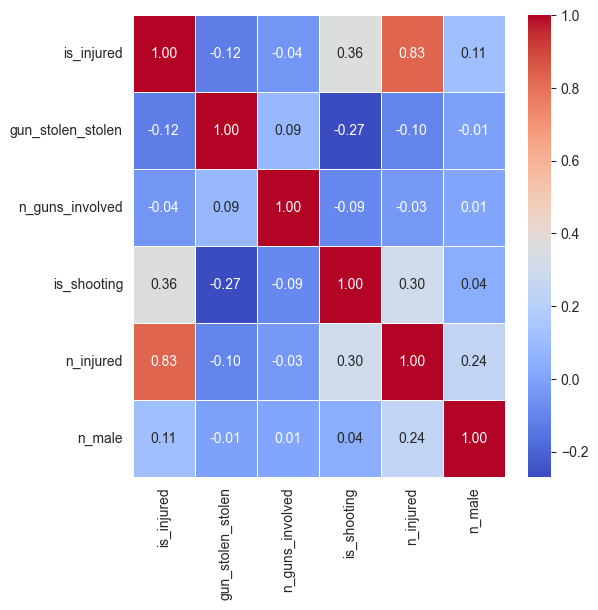

In [222]:
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(sub_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

we can tell that there is some correlation between shooting and injured and when the guns is stolen to when there was shooting

# Qestion 3 - b
First i wanted to check the participants status to sum how many people were injured/dead, but then i realize its kind of cheating if using the amount of people injured/dead directly but
since it makes sense that poeple tend to get injured when there are shooting (and we can see a value of 0.54 corr)
i will extract the number of participants from the participants_age list and i will multiply it by 0.54 and then sum all to total number of injured/dead people


In [223]:
def format_ages(age: str) -> str:
    """
    formatin the age feature
    :param age:
    :return:
    """
    uncleaned_format = age.split("::")[1:]
    str_format = ""
    for exp in uncleaned_format:
        if "||" in exp:
            age = exp.split('||')[0]
            str_format += f"{age},"
        else:
            str_format += exp
    return str_format

In [224]:
def count_people_from_age(age_part_entry: str):
    '''
    extracts the number of people in the inccident from the ages feature
    :param age_part_enty:
    :param age_part:  age paticipamt col entry
    :return: number of people in the inccident
    '''
    return age_part_entry.count(',') + 1

# Answer
Here like in the titanic i gave a rule of thumb for all the shootings in the situation
if there is shooting in the incident - someone injured else nobody is hurt
i will take into account that many time even if there are shootings it might be misse and of course some people will die(which we dont need to calculate) therefore i will reduce haf of the shooting incidents and that will be my prediction


In [225]:
shooting_and_injured_sum = df['is_shooting'].sum() / 2
injured_sum = df['n_injured'].sum()
print(f"Estimated injured people: {shooting_and_injured_sum}")
print(f"Estimated injured people: {injured_sum}")

Estimated injured people: 9713.5
Estimated injured people: 11817


# This is the linear regression please ignore it
# may i ask why regression will not be good for that case?

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df["participant_age"] = df["participant_age"].apply(format_ages)
df['n_participants'] = df['participant_age'].apply(count_people_from_age)
X = df[['n_participants','is_shooting']]
y = df['n_injured']
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2)

regressor = LinearRegression()
regressor.fit(train_x,train_y)

y_pred = regressor.predict(test_x)
mse =mean_squared_error(y_pred,test_y)
estimated_injured = regressor.predict(df[['n_participants','is_shooting']]).sum()
actual_injured = df['n_injured'].sum()
print(f"Actual injured:{actual_injured}\nRegression estimated injured:{round(estimated_injured)}")

Actual injured:11817
Regression estimated injured:11787


# Question 4 - a
1. An aggregation we can make is to see the mean if people injured in each incident in each state
2. Another one would be adding a binary feature indicating if the mean of the people getting injured each incident is above the median of the averages of all means in all the sates
3. of course we can take in account the overall injuries which is dead and injured altogether


In [227]:
df['injury_n'] = df['n_injured'] + df['n_killed']

group_inj_kil = df.groupby(by='state')['injury_n'].sum().reset_index()
group_inc = group_by_state_incidents_n

joined = pd.merge(group_inj_kil,group_inc,on ='state')
joined['injury_ration'] = (joined['injury_n']/joined['crimes_num']).round(2)
median = joined['injury_ration'].median()
# joined

df = pd.merge(df,joined,on='state',how='outer')
gt_fun = lambda x: 1 if x > median else 0
df['gt_injury_ration'] = df['injury_ration'].apply(gt_fun)
df[['injury_ration','gt_injury_ration']].sample(10)

,injury_ration,gt_injury_ration
10814,0.73,1
21565,0.82,1
2405,NaN,0
8,0.61,0
3495,NaN,0
1175,NaN,0
20394,0.69,1
22555,0.85,1
7824,NaN,0
11065,0.87,1


# question 4 - b
The features i would add to this dataset would be
Socio-Ecomonic Status in the area - averaged income in the city/area - Int

Criminal History - Binary - to see if the criminal in the incident already participated in a crime scene before
Number of criminal charges for the criminals - Int - like the first one
Ethnicity and Religious - OneHotEncoded vals



In [228]:
kaggle_df = pd.read_csv('kaggle_income.csv',encoding='latin-1')

In [229]:
kaggle_df.loc[:,'State_Name'] = kaggle_df['State_Name'].str.lower()
grouped_by_state = kaggle_df.groupby(by='State_Name')['Median'].median().reset_index()
merged_df = pd.merge(df, grouped_by_state, left_on='state', right_on='State_Name', how='left')
merged_df.drop(['State_Name'],axis=1,inplace=True)
merged_df = merged_df.rename(columns={'Median':'state_median_inc'})
merged_df[['state','state_median_inc']].sample(19)

,state,state_median_inc
3000,unknown,NaN
3226,unknown,NaN
19658,pennsylvania,51143.0
17438,new jersey,81550.5
17642,new jersey,81550.5
18164,kentucky,40216.0
20528,minnesota,56398.0
20773,wisconsin,54200.5
15801,tennessee,41694.5
13191,new york,61173.5
